# Final Project
Reese Dychiao
rkd9714

## Data Exploration

In [1]:
import pandas as pd
import numpy as np

In [3]:
emissions = pd.read_csv('co2emissions.csv')
emissions.head()

,country,date,sector,value,timestamp
0,Brazil,01/01/2019,Power,0.096799,1546300800
1,China,01/01/2019,Power,14.816100,1546300800
2,EU27 & UK,01/01/2019,Power,1.886490,1546300800
3,France,01/01/2019,Power,0.051217,1546300800
4,Germany,01/01/2019,Power,0.315002,1546300800


In [4]:
emissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135408 entries, 0 to 135407
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   country    135408 non-null  object 
 1   date       135408 non-null  object 
 2   sector     135408 non-null  object 
 3   value      135408 non-null  float64
 4   timestamp  135408 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 5.2+ MB


In [5]:
emissions.value_counts('country')

,count
country,
Brazil,9672
China,9672
EU27 & UK,9672
France,9672
Germany,9672
India,9672
Italy,9672
Japan,9672
ROW,9672


In [6]:
emissions.value_counts('sector')

,count
sector,
Domestic Aviation,22568
Ground Transport,22568
Industry,22568
International Aviation,22568
Power,22568
Residential,22568


In [7]:
emissions['date'] = pd.to_datetime(emissions['date'], dayfirst=True)
emissions.set_index('date', inplace=True)
emissions

,country,sector,value,timestamp
date,,,,
2019-01-01,Brazil,Power,0.096799,1546300800
2019-01-01,China,Power,14.816100,1546300800
2019-01-01,EU27 & UK,Power,1.886490,1546300800
2019-01-01,France,Power,0.051217,1546300800
2019-01-01,Germany,Power,0.315002,1546300800
...,...,...,...,...
2023-05-31,Russia,International Aviation,0.016524,1685491200
2023-05-31,Spain,International Aviation,0.068408,1685491200
2023-05-31,UK,International Aviation,0.103774,1685491200


In [8]:
world_emissions = emissions[emissions['country'] == 'WORLD']
world_emissions

,country,sector,value,timestamp
date,,,,
2019-01-01,WORLD,Power,36.83320,1546300800
2019-01-02,WORLD,Power,39.11250,1546387200
2019-01-03,WORLD,Power,39.78680,1546473600
2019-01-04,WORLD,Power,40.42570,1546560000
2019-01-05,WORLD,Power,39.17760,1546646400
...,...,...,...,...
2023-05-27,WORLD,International Aviation,1.65229,1685145600
2023-05-28,WORLD,International Aviation,1.62929,1685232000
2023-05-29,WORLD,International Aviation,1.58654,1685318400


In [9]:
average_emissions = world_emissions['value'].groupby('date').mean()

In [10]:
average_emissions.head()

,value
date,
2019-01-01,16.190175
2019-01-02,17.193493
2019-01-03,17.605170
2019-01-04,17.817105
2019-01-05,17.114223


In [11]:
import matplotlib.pyplot as plt

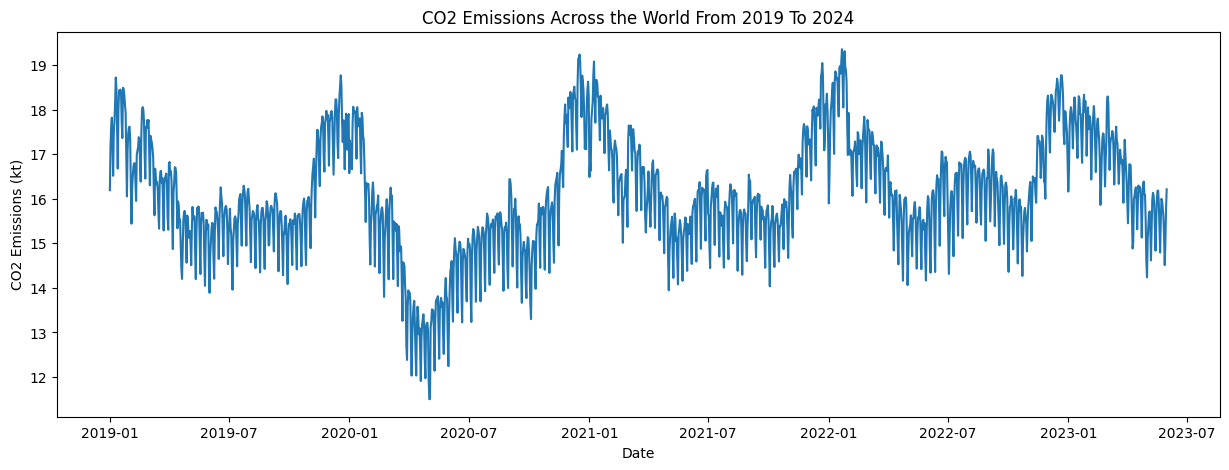

In [12]:
plt.figure(figsize=(15, 5))
plt.title("CO2 Emissions Across the World From 2019 To 2024")
plt.xlabel("Date")
plt.ylabel("CO2 Emissions (kt)")
plt.plot(average_emissions.index, average_emissions)
plt.show()

In [13]:
!pip install sktime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.8/36.8 MB 45.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.5/141.5 kB 10.5 MB/s eta 0:00:00


In [14]:
from sktime.utils.plotting import plot_correlations, plot_series

(<Figure size 1200x800 with 3 Axes>,
 array([<Axes: ylabel='value'>,
        <Axes: title={'center': 'Autocorrelation'}>,
        <Axes: title={'center': 'Partial Autocorrelation'}>], dtype=object))

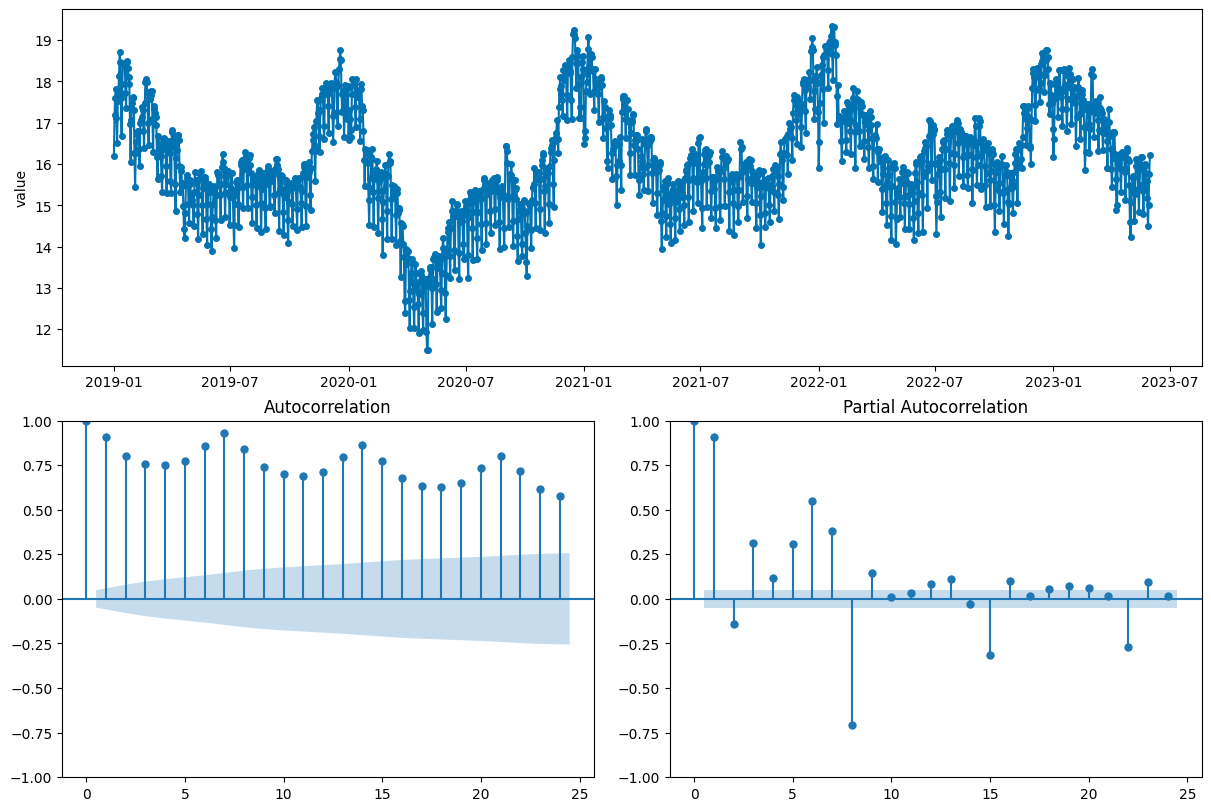

In [95]:
plot_correlations(average_emissions)

## Train Test Split

In [15]:
from sktime.split import temporal_train_test_split

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


(<Figure size 1600x400 with 1 Axes>,
 <Axes: title={'center': 'Train Test Split'}, ylabel='value'>)

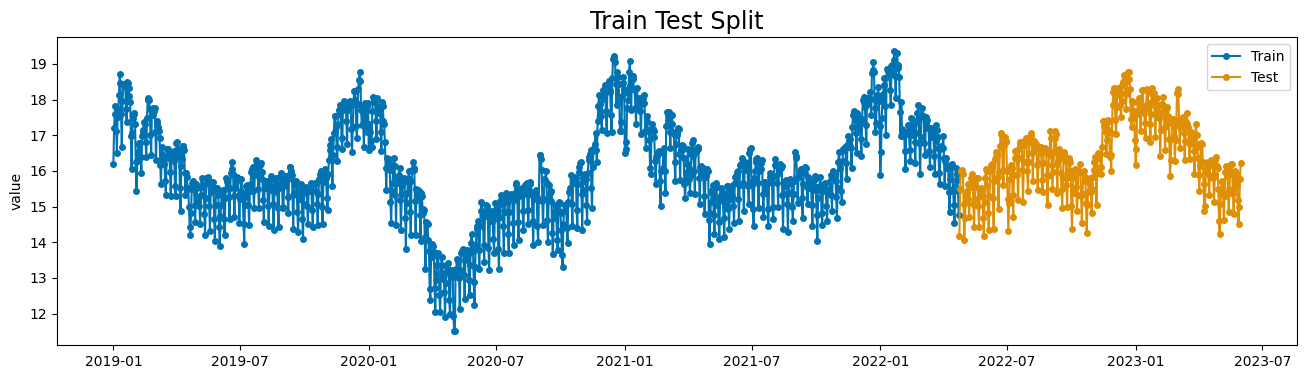

In [16]:
X_train, X_test = temporal_train_test_split(average_emissions)
plot_series(X_train, X_test, labels=['Train', 'Test'], title='Train Test Split')

## Naive Forecasting

In [17]:
from sktime.forecasting.naive import NaiveForecaster

In [18]:
fh = np.arange(1, len(X_test)+1)
forecaster = NaiveForecaster(strategy='drift')
forecaster.fit(X_train)
yhat = forecaster.predict(fh)

In [19]:
def plot_series(train, test, forecast, labels=None):
    plt.figure(figsize=(10, 6))
    plt.plot(train.index, train, label=labels[0])
    plt.plot(test.index, test, label=labels[1])
    plt.plot(test.index, forecast, label=labels[2])
    plt.legend()
    plt.show()

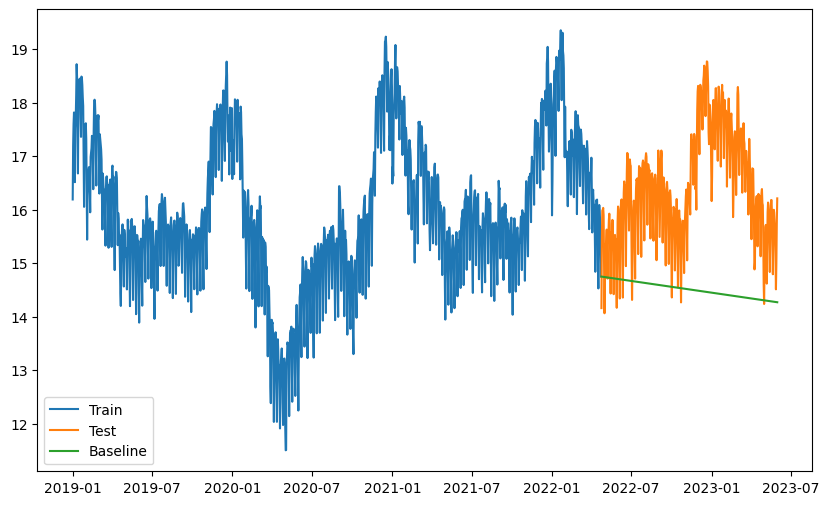

In [101]:
plot_series(X_train, X_test, yhat, labels=['Train', 'Test', 'Baseline'])

In [20]:
from sktime.performance_metrics.forecasting import MeanAbsolutePercentageError

In [21]:
mae = MeanAbsolutePercentageError()

In [103]:
mae(X_test, yhat)

0.11326477593326992

## Simple Exponential Smoothing

In [22]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing

In [31]:
exp = ExponentialSmoothing()
exp.fit(X_train)
exp_predictions = exp.predict(fh)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


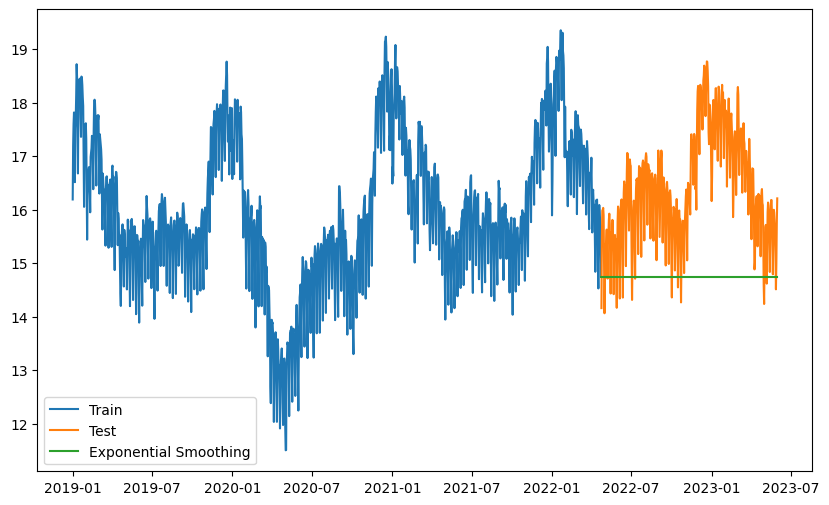

In [32]:
plot_series(X_train, X_test, exp_predictions, labels=['Train', 'Test', 'Exponential Smoothing'])

In [33]:
mae(X_test, exp_predictions)

0.0993644636781982

## Holt-Winters'

In [23]:
hw = ExponentialSmoothing(trend = 'add', seasonal = 'add', sp=365)
hw.fit(X_train)
hw_predictions = hw.predict(fh)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


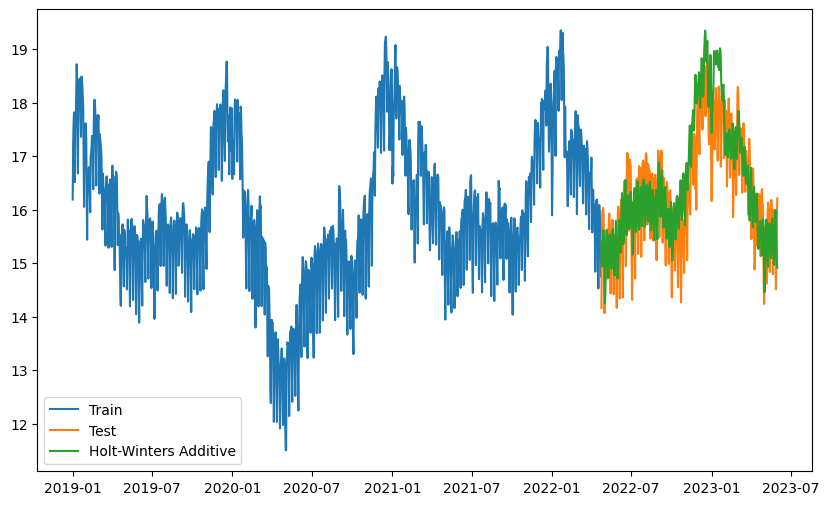

In [24]:
plot_series(X_train, X_test, hw_predictions, labels=['Train', 'Test', 'Holt-Winters Additive'])

In [25]:
mae(X_test, hw_predictions)

0.03918197683544264

In [26]:
from sklearn.metrics import r2_score

In [27]:
r2_score(X_test, hw_predictions)

0.421162051369254

In [28]:
hw_mul = ExponentialSmoothing(trend = 'add', seasonal= 'mul', sp=365)
hw_mul.fit(X_train)
hw_mul_predictions = hw_mul.predict(fh)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


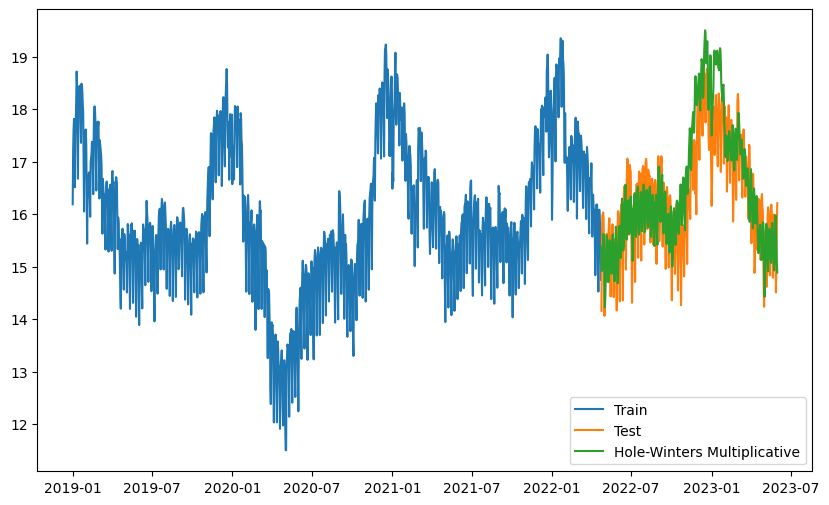

In [29]:
plot_series(X_train, X_test, hw_mul_predictions, labels=['Train', 'Test', 'Hole-Winters Multiplicative'])

In [30]:
mae(X_test, hw_mul_predictions)

0.04050815855241215

In [31]:
r2_score(X_test, hw_mul_predictions)

0.37957787154693157

## AutoRegression

In [40]:
from sktime.forecasting.auto_reg import AutoREG

In [41]:
ar = AutoREG(lags = 12)
ar.fit(X_train)
ar_predictions = ar.predict(fh)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


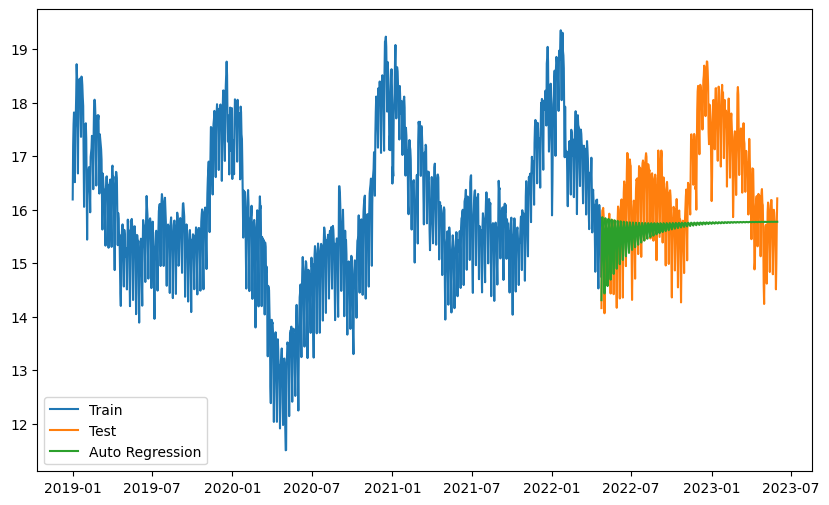

In [42]:
plot_series(X_train, X_test, ar_predictions, labels=['Train', 'Test', 'Auto Regression'])

In [43]:
ar.get_fitted_params()

{'aic': 263.3766003669251,
 'aicc': 263.7319303161637,
 'bic': 334.60263224473675,
 'hqic': 290.2102062813707,
 'const': 0.26252608650025483,
 'value.L1': 0.9938573057307012,
 'value.L2': -0.21899113541091864,
 'value.L3': 0.0444141749858867,
 'value.L4': 0.060336579437041744,
 'value.L5': -0.09302659669733321,
 'value.L6': 0.02466037387903571,
 'value.L7': 0.854376894406615,
 'value.L8': -0.8390269601284501,
 'value.L9': 0.15117013439581373,
 'value.L10': -0.007952294703648197,
 'value.L11': -0.06727964714879485,
 'value.L12': 0.0808212981697365}

In [44]:
mae(X_test, ar_predictions)

0.054428922473567704

## ARIMA

### Differencing the Data

In [45]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(average_emissions)
print('p-value:', result[1])

p-value: 0.016332416691326148


In [2]:
from sktime.forecasting.arima import ARIMA

In [47]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.1 MB/s eta 0:00:00


In [21]:
arima = ARIMA(order=(1, 1, 1))
arima.fit(X_train)
arima_predictions = arima.predict(fh)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


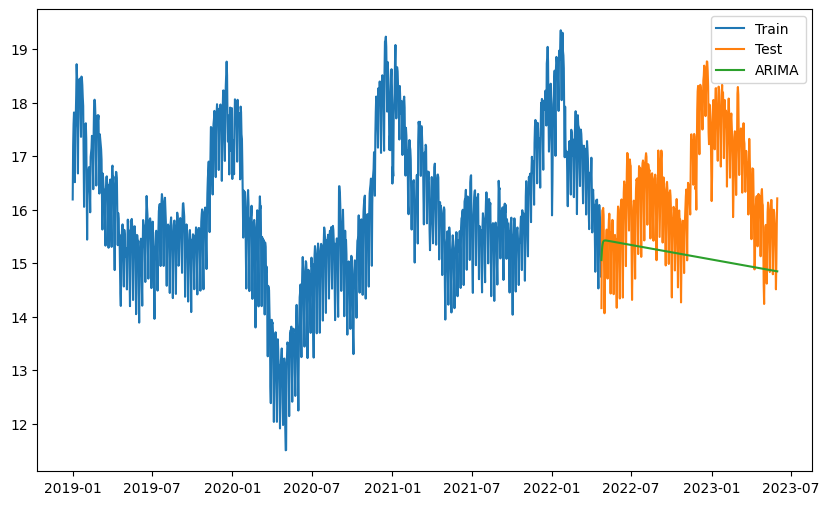

In [28]:
plot_series(X_train, X_test, arima_predictions, labels=['Train', 'Test', 'ARIMA'])

In [29]:
mae(X_test, arima_predictions)

0.08040052634781474

## AutoARIMA

In [30]:
from sktime.forecasting.arima import AutoARIMA

In [31]:
auto_arima = AutoARIMA()
auto_arima.fit(X_train)
auto_arima_predictions = auto_arima.predict(fh)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information

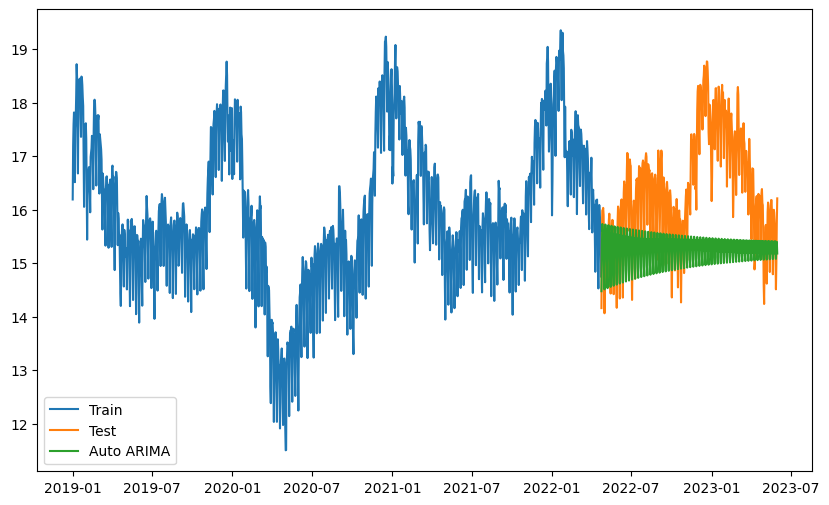

In [32]:
plot_series(X_train, X_test, auto_arima_predictions, labels=['Train', 'Test', 'Auto ARIMA'])

In [33]:
mae(X_test, auto_arima_predictions)

0.0697915130605037

In [34]:
auto_arima.get_fitted_params()

{'ar.L1': 0.2965995110775828,
 'ar.L2': -1.0394540041310099,
 'ar.L3': 0.08215471767149252,
 'ar.L4': -0.5896186963576417,
 'ar.L5': -0.4907473705153927,
 'ma.L1': -0.6423031203295058,
 'ma.L2': 1.2945242365224163,
 'ma.L3': -0.6832567916112174,
 'ma.L4': 0.8364757190243631,
 'sigma2': 0.0811043087963086,
 'order': (5, 1, 4),
 'seasonal_order': (0, 0, 0, 0),
 'aic': 444.1326983843944,
 'aicc': 444.3164911997662,
 'bic': 495.099912169342,
 'hqic': 463.325356378761}

## Long Short Term Memory

### Feature Engineering

In [32]:
!pip install tsfresh

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.8/95.8 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.5/176.5 kB 14.8 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.14.1 which is incompatible.


In [33]:
from tsfresh import extract_features, select_features
from tsfresh.utilities.dataframe_functions import make_forecasting_frame

df_shift, y = make_forecasting_frame(average_emissions, kind='value', max_timeshift=365, rolling_direction=1)

extracted_features = extract_features(df_shift, column_id='id', column_sort='time', column_value='value')
extracted_features, y = extracted_features.align(y, join='inner', axis=0)

Feature Extraction: 100%|██████████| 1611/1611 [07:56<00:00,  3.38it/s]


In [34]:
extracted_features = extracted_features.fillna(0)
selected_features = select_features(extracted_features, y)

In [35]:
selected_features

value__index_mass_quantile__q_0.9  \
id 2019-01-02                            1.00000   
   2019-01-03                            1.00000   
   2019-01-04                            1.00000   
   2019-01-05                            1.00000   
   2019-01-06                            1.00000   
...                                          ...   
   2023-05-27                            0.89589   
   2023-05-28                            0.89589   
   2023-05-29                            0.89589   
   2023-05-30                            0.89589   
   2023-05-31                            0.89589   

               value__energy_ratio_by_chunks__num_segments_10__segment_focus_9  \
id 2019-01-02                                           0.000000                 
   2019-01-03                                           0.000000                 
   2019-01-04                                           0.000000                 
   2019-01-05                                           0.000000                 
   2019-01-06                                           0.000000                 
...                                                          ...                 
   2023-05-27                                           0.088047                 
   2023-05-28                                           0.087722                 
   2023-05-29                                           0.087333                 
   2023-05-30                                           0.087273                 
   2023-05-31                                           0.087212                 

               value__index_mass_quantile__q_0.8  \
id 2019-01-02                           1.000000   
   2019-01-03                           1.000000   
   2019-01-04                           1.000000   
   2019-01-05                           1.000000   
   2019-01-06                           0.800000   
...                                          ...   
   2023-05-27                           0.794521   
   2023-05-28                           0.794521   
   2023-05-29                           0.794521   
   2023-05-30                           0.794521   
   2023-05-31                           0.794521   

               value__cwt_coefficients__coeff_1__w_2__widths_(2, 5, 10, 20)  \
id 2019-01-02                                           0.000000              
   2019-01-03                                          18.603751              
   2019-01-04                                          24.262857              
   2019-01-05                                          22.169411              
   2019-01-06                                          24.262857              
...                                                          ...              
   2023-05-27                                           7.717842              
   2023-05-28                                           7.087179              
   2023-05-29                                           7.595499              
   2023-05-30                                           8.839900              
   2023-05-31                                           9.613267              

               value__cwt_coefficients__coeff_2__w_5__widths_(2, 5, 10, 20)  \
id 2019-01-02                                           0.000000              
   2019-01-03                                           0.000000              
   2019-01-04                                          13.104157              
   2019-01-05                                          24.771443              
   2019-01-06                                          29.624161              
...                                                          ...              
   2023-05-27                                          10.376885              
   2023-05-28                                          10.402758              
   2023-05-29                                          10.669577              
   2023-05-30                            

### Creating the LSTM Model

In [36]:
from tensorflow.keras.models import Sequential

In [37]:
from keras.layers import LSTM, Dense

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
from tensorflow.keras.optimizers import Adam

In [41]:
scaler = MinMaxScaler()
X = selected_features.values

X = np.nan_to_num(X, nan=0.0, posinf=1e6, neginf=-1e6)
X = np.clip(X, -1e6, 1e6)

X_normalized = scaler.fit_transform(X)

X_reshaped = X_normalized.reshape(X_normalized.shape[0], 1, X_normalized.shape[1])
y_values = y.values

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_values, test_size=0.2, random_state=42)

In [43]:
lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [44]:
history = lstm_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1, shuffle=False)

Epoch 1/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 145.9368 - val_loss: 3.2990
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.3792 - val_loss: 1.3543
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.4582 - val_loss: 1.1525
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.1991 - val_loss: 0.9429
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9734 - val_loss: 0.7690
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7848 - val_loss: 0.6090
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6144 - val_loss: 0.4497
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4657 - val_loss: 0.3341
Epoch 9/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3633 - val_loss: 0.2765
Epoch 10/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3122 - val_loss: 0.2462
Epoch 11/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2831 - val_loss: 0.2294
Epoch 12/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.2641 - va

In [45]:
predictions = lstm_model.predict(X_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


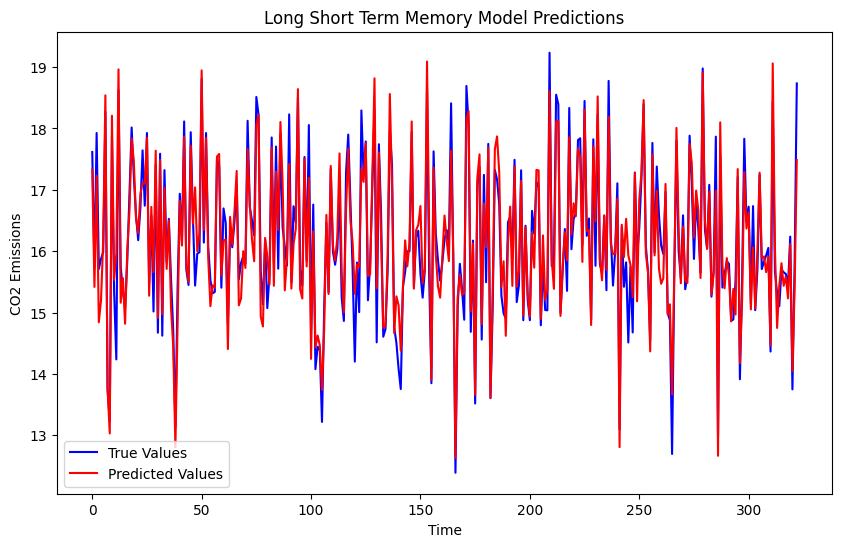

In [46]:
plt.figure(figsize=(10,6))

plt.plot(y_test, label='True Values', color='blue')
plt.plot(predictions, label='Predicted Values', color='red')

plt.xlabel('Time')
plt.ylabel('CO2 Emissions')
plt.title('Long Short Term Memory Model Predictions')
plt.legend()

plt.show()

In [47]:
mae(y_test, predictions)

0.018706459748272737

In [48]:
r2_score(y_test, predictions)

0.8984210912583769